In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import seaborn as sns

In [9]:
# Load datasets

plants_df = pd.read_csv('../data/dataset_edible_plants.csv')
weather_df = pd.read_csv('../data/dataset_weather.csv')

In [10]:
weather_df

,UNIXTimestamp,Location,LocationKoppenGeigerClassification,AirTemperatureCelsius,AirPressure_hPa,WindSpeed_kmh,WindDirection_deg,Humidity_percent,CloudCoverage_percent,Precipitation_mm
0,1672524000,Airstrip One,Af,27.941921,1026.522945,11.299696,48.197129,93.292156,69.876469,0.283086
1,1672610400,Airstrip One,Af,27.585284,1006.617087,21.030866,58.767936,101.558369,94.675106,7.546799
2,1672696800,Airstrip One,Af,29.547875,1005.676839,16.585643,197.157168,94.418553,73.255659,6.924607
3,1672783200,Airstrip One,Af,29.328846,1013.190731,7.329083,109.896105,95.669383,77.008149,2.144308
4,1672869600,Airstrip One,Af,23.988730,1010.705085,13.229805,153.633956,101.999035,95.997104,3.103873
...,...,...,...,...,...,...,...,...,...,...
3645,1703628000,Prole District,ET,-7.621098,1010.106098,21.348198,267.203910,48.572941,42.864706,1.179225
3646,1703714400,Prole District,ET,-11.122707,1004.032517,12.604921,210.712372,45.078644,25.393222,0.259620
3647,1703800800,Prole District,ET,-20.153963,1001.831065,7.010456,271.742991,48.354019,41.770093,2.452235
3648,1703887200,Prole District,ET,-14.995727,1024.862696,7.577397,111.900508,46.961285,34.806424,2.039002


In [11]:
plants_df

,Name,Latin Name,Growth Climate,Watering Needs,Time to Consumable (days),Weight when Full Grown (kg),Kcal per 100g,Proteins per 100g (g)
0,Apple,Malum vulgaris,Temperate,Moderate,83,3.04,256.9,7.9
1,Banana,Musa minor,Mediterranean,High,181,4.85,26.1,7.9
2,Mango,Mangifera vulgaris,Arid,Moderate,352,2.38,263.5,2.0
3,Orange,Citrus latifolia,Tropical,Moderate,296,4.70,13.4,9.2
4,Peach,Prunus sapiens,Polar,Low,182,0.26,286.1,7.2
...,...,...,...,...,...,...,...,...
233,Pansy,Pansy major,Temperate,High,71,1.45,278.8,8.9
234,Rose,Rose vulgaris,Tropical,Moderate,34,4.69,386.6,1.4
235,Safflower,Safflower sapiens,Arid,Moderate,313,2.07,29.3,1.6
236,Sunflower,Sunflower latifolia,Temperate,High,187,4.27,329.3,3.0


In [12]:
# Extract unique climate classifications
climate_types = weather_df['LocationKoppenGeigerClassification'].unique()
climate_types

array(['Af', 'Am', 'Aw', 'Cfb', 'Cfa', 'Csb', 'Csc', 'Dfb', 'Dfc', 'ET'],
      dtype=object)

In [13]:
climate_mapping = {
    'Af': 'Tropical',     # Tropical rainforest
    'Am': 'Tropical',     # Tropical monsoon
    'Aw': 'Tropical',     # Tropical savanna
    'BWh': 'Desert',      # Hot desert
    'BSh': 'Desert',      # Hot semi-arid
    'Csa': 'Mediterranean', # Mediterranean
    'Csb': 'Mediterranean', # Mediterranean
    'Cfa': 'Subtropical', # Humid subtropical
    'Cfb': 'Temperate',   # Oceanic
    'Dfa': 'Continental', # Humid continental
    'Dfb': 'Continental', # Humid continental
    'Dfc': 'Boreal',      # Subarctic
    'ET': 'Tundra',       # Tundra
}

# Create new column with mapped climate names
weather_df['ClimateType'] = weather_df['LocationKoppenGeigerClassification'].map(climate_mapping)

# Display unique values to verify mapping
print(weather_df[['LocationKoppenGeigerClassification', 'ClimateType']].drop_duplicates())

     LocationKoppenGeigerClassification    ClimateType
0                                    Af       Tropical
365                                  Am       Tropical
730                                  Aw       Tropical
1095                                Cfb      Temperate
1460                                Cfa    Subtropical
1825                                Csb  Mediterranean
2190                                Csc            NaN
2555                                Dfb    Continental
2920                                Dfc         Boreal
3285                                 ET         Tundra


In [14]:
weather_df

,UNIXTimestamp,Location,LocationKoppenGeigerClassification,AirTemperatureCelsius,AirPressure_hPa,WindSpeed_kmh,WindDirection_deg,Humidity_percent,CloudCoverage_percent,Precipitation_mm,ClimateType
0,1672524000,Airstrip One,Af,27.941921,1026.522945,11.299696,48.197129,93.292156,69.876469,0.283086,Tropical
1,1672610400,Airstrip One,Af,27.585284,1006.617087,21.030866,58.767936,101.558369,94.675106,7.546799,Tropical
2,1672696800,Airstrip One,Af,29.547875,1005.676839,16.585643,197.157168,94.418553,73.255659,6.924607,Tropical
3,1672783200,Airstrip One,Af,29.328846,1013.190731,7.329083,109.896105,95.669383,77.008149,2.144308,Tropical
4,1672869600,Airstrip One,Af,23.988730,1010.705085,13.229805,153.633956,101.999035,95.997104,3.103873,Tropical
...,...,...,...,...,...,...,...,...,...,...,...
3645,1703628000,Prole District,ET,-7.621098,1010.106098,21.348198,267.203910,48.572941,42.864706,1.179225,Tundra
3646,1703714400,Prole District,ET,-11.122707,1004.032517,12.604921,210.712372,45.078644,25.393222,0.259620,Tundra
3647,1703800800,Prole District,ET,-20.153963,1001.831065,7.010456,271.742991,48.354019,41.770093,2.452235,Tundra
3648,1703887200,Prole District,ET,-14.995727,1024.862696,7.577397,111.900508,46.961285,34.806424,2.039002,Tundra


In [15]:
# Get unique locations and their climate types
locations = weather_df[['Location', 'ClimateType']].drop_duplicates()

In [16]:
# Extract unique climate classifications
climate_types = weather_df['LocationKoppenGeigerClassification'].unique()

In [17]:
# Create label encoders
climate_encoder = LabelEncoder()
plants_df['climate_code'] = climate_encoder.fit_transform(plants_df['Growth Climate'])

In [18]:
# Define a simple compatibility function
def calculate_compatibility(plant_climate, location_climate):
    # Map Koppen climate classes to general growth climates
    koppen_to_growth = {
        'Af': 'Tropical',     # Tropical rainforest
        'Am': 'Tropical',     # Tropical monsoon
        'Aw': 'Tropical',     # Tropical savanna
        'BWh': 'Desert',      # Hot desert
        'BSh': 'Desert',      # Hot semi-arid
        'Csa': 'Mediterranean', # Mediterranean
        'Csb': 'Mediterranean', # Mediterranean
        'Cfa': 'Subtropical', # Humid subtropical
        'Cfb': 'Temperate',   # Oceanic
        'Dfa': 'Continental', # Humid continental
        'Dfb': 'Continental', # Humid continental
        'Dfc': 'Boreal',      # Subarctic
        'ET': 'Tundra',       # Tundra
    }
    
    location_growth_climate = koppen_to_growth.get(location_climate, 'Temperate')
    
    # Complex compatibility scoring (0-10)
    
    # Define climate compatibility relationships
    climate_compatibility = {
        'Tropical': {'Tropical': 10, 'Subtropical': 7, 'Mediterranean': 5, 'Temperate': 4, 'Desert': 3, 'Continental': 2, 'Boreal': 1, 'Tundra': 0},
        'Subtropical': {'Tropical': 8, 'Subtropical': 10, 'Mediterranean': 8, 'Temperate': 6, 'Desert': 4, 'Continental': 3, 'Boreal': 1, 'Tundra': 0},
        'Mediterranean': {'Tropical': 5, 'Subtropical': 7, 'Mediterranean': 10, 'Temperate': 7, 'Desert': 6, 'Continental': 4, 'Boreal': 2, 'Tundra': 0},
        'Temperate': {'Tropical': 3, 'Subtropical': 6, 'Mediterranean': 7, 'Temperate': 10, 'Desert': 4, 'Continental': 7, 'Boreal': 4, 'Tundra': 1},
        'Desert': {'Tropical': 4, 'Subtropical': 5, 'Mediterranean': 6, 'Temperate': 4, 'Desert': 10, 'Continental': 2, 'Boreal': 1, 'Tundra': 0},
        'Continental': {'Tropical': 2, 'Subtropical': 4, 'Mediterranean': 5, 'Temperate': 7, 'Desert': 3, 'Continental': 10, 'Boreal': 6, 'Tundra': 3},
        'Boreal': {'Tropical': 0, 'Subtropical': 1, 'Mediterranean': 2, 'Temperate': 4, 'Desert': 1, 'Continental': 6, 'Boreal': 10, 'Tundra': 7},
        'Polar': {'Tropical': 0, 'Subtropical': 0, 'Mediterranean': 1, 'Temperate': 2, 'Desert': 0, 'Continental': 3, 'Boreal': 6, 'Tundra': 9},
        'Arid': {'Tropical': 2, 'Subtropical': 3, 'Mediterranean': 5, 'Temperate': 3, 'Desert': 9, 'Continental': 2, 'Boreal': 0, 'Tundra': 0},
        'Tundra': {'Tropical': 0, 'Subtropical': 0, 'Mediterranean': 0, 'Temperate': 1, 'Desert': 0, 'Continental': 2, 'Boreal': 5, 'Tundra': 10}
    }
    
    # Get base compatibility score
    base_score = climate_compatibility.get(plant_climate, {}).get(location_growth_climate, 3)
    
    # Special case adjustments
    if plant_climate == 'Temperate' and location_growth_climate == 'Continental':
        # Temperate plants can adapt to continental climates with protection
        base_score += 1
    elif plant_climate == 'Mediterranean' and location_growth_climate == 'Desert':
        # Many Mediterranean plants are drought-tolerant
        base_score += 1
    elif plant_climate == 'Tropical' and location_growth_climate in ['Boreal', 'Tundra']:
        # Tropical plants cannot survive in very cold climates
        base_score = 0
        
    return base_score
        
# Create compatibility matrix
compatibility_matrix = {}
for climate in climate_types:
    compatibility_matrix[climate] = {}
    for _, plant in plants_df.iterrows():
        compatibility_matrix[climate][plant['Name']] = calculate_compatibility(
            plant['Growth Climate'], climate)

# Convert to DataFrame for easier use
compatibility_df = pd.DataFrame(compatibility_matrix)

<Axes: >

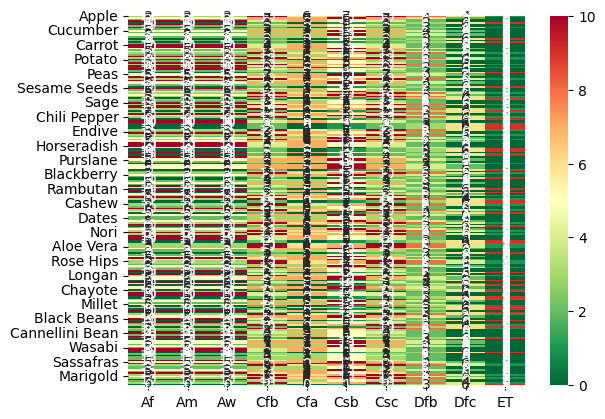

In [19]:
# plot heatmap of compatibility matrix
sns.heatmap(compatibility_df, cmap='RdYlGn_r', center=5, annot=True)

In [20]:
compatibility_df

,Af,Am,Aw,Cfb,Cfa,Csb,Csc,Dfb,Dfc,ET
Apple,3,3,3,10,6,7,10,8,4,1
Banana,5,5,5,7,7,10,7,4,2,0
Mango,2,2,2,3,3,5,3,2,0,0
Orange,10,10,10,4,7,5,4,2,0,0
Peach,0,0,0,2,0,1,2,3,6,9
...,...,...,...,...,...,...,...,...,...,...
Pansy,3,3,3,10,6,7,10,8,4,1
Rose,10,10,10,4,7,5,4,2,0,0
Safflower,2,2,2,3,3,5,3,2,0,0
Sunflower,3,3,3,10,6,7,10,8,4,1


In [21]:
compatibility_df.to_csv('data/plants_compatibility_matrix.csv')

OSError: Cannot save file into a non-existent directory: 'data'